# Data Science I Final Project: Data Visualization

## Setup

In [201]:
# hugging face
from transformers import pipeline
import os
from tqdm import tqdm

## Input Data

In [202]:
#Getting comment data from csv. This DF will be used to make the analysis
pop_comments_sentiment = pd.read_csv('swift_pop_comments.csv')

#Getting comment data from csv. This DF will be used to make the analysis
horrific_comments_sentiment = pd.read_csv('ukraine_horrific_comments.csv')

#Getting comment data from csv. This DF will be used to make the analysis
uvalde_horrific_sentiment = pd.read_csv('uvalde_horrific_comments.csv')

#Getting comment data from csv. This DF will be used to make the analysis
menendez_scandal_sentiment = pd.read_csv('menendez_scandal_comments.csv')




## Functions

In [13]:
# Functions

## Creating 3 columns for sentiments and scores function
def get_sentiment_score(sentiment_list, target_label):
    for sentiment_dict in sentiment_list[0]:
        if sentiment_dict['label'] == target_label:
            return sentiment_dict['score']
    return None

# Initialize the sentiment analyzer
sentiment_analyzer = pipeline("sentiment-analysis", model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", return_all_scores=True)

def get_sentiment_score(sentiment_list, target_label):
    for sentiment_dict in sentiment_list[0]: 
        if sentiment_dict['label'] == target_label:
            return sentiment_dict['score']
    return None

# Truncate text from comments to limit of 512
def truncate_text(text):
    if isinstance(text, str):
        return text[:512]
    else:
        return text

## Data management

C:\Users\samue\AppData\Local\Temp\ipykernel_37868\4200967890.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


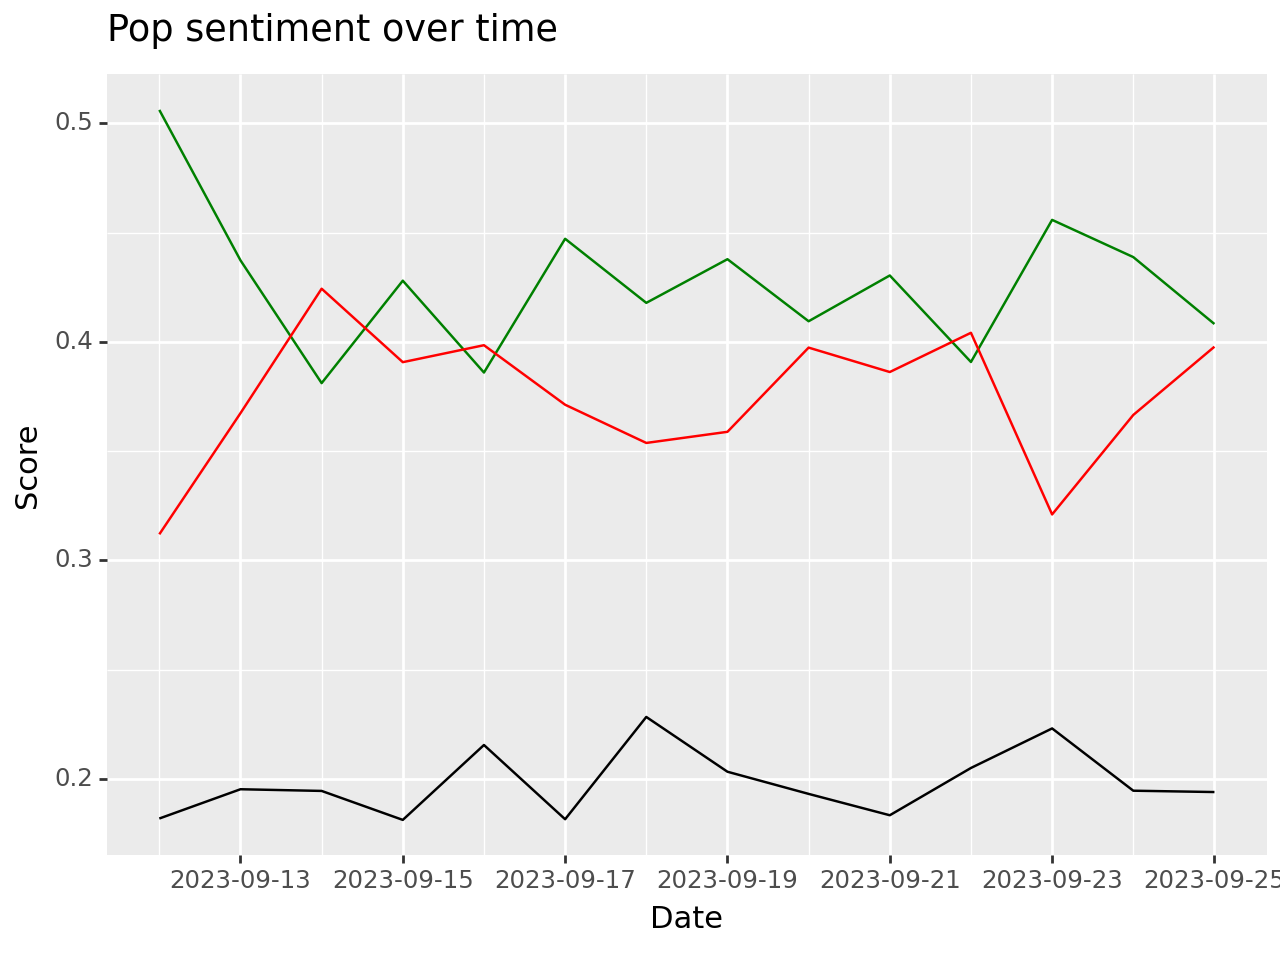

<Figure Size: (640 x 480)>

In [179]:
# Truncate text Pop news
pop_comments_sentiment.loc[:, 'text'] = pop_comments_sentiment['text'].apply(truncate_text)

# Filter out NaN values before applying sentiment analysis
pop_comments_sentiment_NA = pop_comments_sentiment.dropna(subset=['text'])

# Truncate text Horrific
horrific_comments_sentiment.loc[:, 'text'] = horrific_comments_sentiment['text'].apply(truncate_text)

# Filter out NaN values before applying sentiment analysis
horrific_comments_sentiment_NA = horrific_comments_sentiment.dropna(subset=['text'])

# Subsetting datasets due to size
total_rows = horrific_comments_sentiment_NA.shape[0]
num_subsets = 10
subset_size = total_rows // num_subsets
subsets = [horrific_comments_sentiment_NA.iloc[i*subset_size : (i+1)*subset_size, :] for i in range(num_subsets)]

#Truncating data for Uvalde
uvalde_horrific_sentiment.loc[:, 'text'] = uvalde_horrific_sentiment['text'].apply(truncate_text)

# Filter out NaN values before applying sentiment analysis
uvalde_horrific_sentiment_NA = uvalde_horrific_sentiment.dropna(subset=['text'])

#Subsetting dataset
total_rows = uvalde_horrific_sentiment_NA.shape[0]
num_subsets = 10
subset_size = total_rows // num_subsets
subsets = [uvalde_horrific_sentiment_NA.iloc[i*subset_size : (i+1)*subset_size, :] for i in range(num_subsets)]


#Truncating text for Menendez
menendez_scandal_sentiment.loc[:, 'text'] = menendez_scandal_sentiment['text'].apply(truncate_text)
# Filter out NaN values before applying sentiment analysis
menendez_scandal_sentiment_NA = menendez_scandal_sentiment.dropna(subset=['text'])

## Sentiment Analysis

In [ ]:
#Applying sentiment analyzer onto dataset with tqdm to see progresse. Pop News
tqdm.pandas(desc=\"Applying Sentiment Analysis\")
pop_comments_sentiment_NA['sentiment'] = pop_comments_sentiment_NA['text'].progress_apply(lambda x: sentiment_analyzer(x))

# Create separate columns for 'positive', 'neutral', and 'negative'
pop_comments_sentiment_NA['positive_score'] = pop_comments_sentiment_NA['sentiment'].apply(lambda x: get_sentiment_score(x, 'positive'))
pop_comments_sentiment_NA['neutral_score'] = pop_comments_sentiment_NA['sentiment'].apply(lambda x: get_sentiment_score(x, 'neutral'))
pop_comments_sentiment_NA['negative_score'] = pop_comments_sentiment_NA['sentiment'].apply(lambda x: get_sentiment_score(x, 'negative'))

#csv file output after sentiment analysis
pop_comments_sentiment_NA.to_csv('swift_pop_sentiment.csv')

# Apply sentiment analysis and create additional columns for each subset. Horrific
for i, subset in tqdm(enumerate(subsets), total=num_subsets, desc=\"Applying Sentiment Analysis\"):
    # Apply sentiment analysis to the 'text' column
    subset['sentiment'] = subset['text'].apply(lambda x: sentiment_analyzer(x))
    # Create separate columns for 'positive', 'neutral', and 'negative' scores
    subset['positive_score'] = subset['sentiment'].apply(lambda x: get_sentiment_score(x, 'positive'))
    subset['neutral_score'] = subset['sentiment'].apply(lambda x: get_sentiment_score(x, 'neutral'))
    subset['negative_score'] = subset['sentiment'].apply(lambda x: get_sentiment_score(x, 'negative'))
    # Save each subset to a different CSV file\n",
    subset.to_csv(f'ukraine_scandal_sentiment_subset_{i + 1}.csv', index=False)

# Apply sentiment analysis and create additional columns for each subset\n",
    for i, subset in tqdm(enumerate(subsets), total=num_subsets, desc=\"Applying Sentiment Analysis\"):
        # Apply sentiment analysis to the 'text' column
        subset['sentiment'] = subset['text'].apply(lambda x: sentiment_analyzer(x))
        
        # Create separate columns for 'positive', 'neutral', and 'negative' scores
        subset['positive_score'] = subset['sentiment'].apply(lambda x: get_sentiment_score(x, 'positive'))
        subset['neutral_score'] = subset['sentiment'].apply(lambda x: get_sentiment_score(x, 'neutral'))
        subset['negative_score'] = subset['sentiment'].apply(lambda x: get_sentiment_score(x, 'negative'))
        
        # Save each subset to a different CSV file
        subset.to_csv(f'uvalde_horrific_sentiment_subset_{i + 1}.csv', index=False)

# Using tqdm lib to see progress and applying sentiment model for Menendez
tqdm.pandas(desc=\"Applying Sentiment Analysis\")
menendez_scandal_sentiment_NA['sentiment'] = menendez_scandal_sentiment_NA['text'].progress_apply(lambda x: sentiment_analyzer(x))

# Create separate columns for 'positive', 'neutral', and 'negative'
menendez_scandal_sentiment_NA['positive_score'] = menendez_scandal_sentiment_NA['sentiment'].apply(lambda x:get_sentiment_score(x, 'positive'))
menendez_scandal_sentiment_NA['neutral_score'] = menendez_scandal_sentiment_NA['sentiment'].apply(lambda x:get_sentiment_score(x, 'neutral'))
menendez_scandal_sentiment_NA['negative_score'] = menendez_scandal_sentiment_NA['sentiment'].apply(lambda x:get_sentiment_score(x, 'negative'))
#csv file output after sentiment analysis
menendez_scandal_sentiment_NA.to_csv('menendez_scandal_sentiment.csv')